In [2]:
import numpy as np
import matplotlib.pyplot as plt

from slice_sampling import slice_sample, step_out_expansion, sample_acceptable_set

In [3]:
def quad(x, mu, var):
    
    return - 0.5 * np.log(2 * np.pi * var) - 0.5 * (x - mu) ** 2 / var

In [4]:
np.random.seed(1)

mu = 0.
var = 1.

x0 = 0.3
y = - 2.

w = 1.
m = 10

unnorm_log_prob = lambda x : quad(x, mu, var)

L, R, (Lhist, Rhist) = step_out_expansion(x0=x0, y=y, unnorm_log_prob=unnorm_log_prob, w=w, m=m)

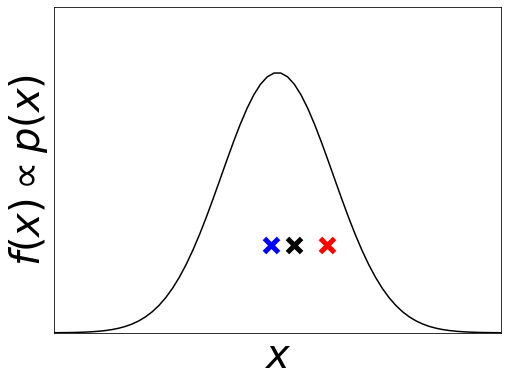

In [5]:
x = np.linspace(-6., 6., 100)
f = list(map(unnorm_log_prob, x))

plt.figure(figsize=(8, 6))
plt.plot(x, np.exp(f), color='black')
plt.scatter(x0, np.exp(y), color='black', marker='x', zorder=3, s=200, linewidth=5)
plt.scatter(Lhist[0], np.exp(y), color='blue', marker='x', s=200, linewidth=5)
plt.scatter(Rhist[0], np.exp(y), color='red', marker='x', s=200, linewidth=5)

plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.savefig('images/stepout1.pdf')
plt.show()

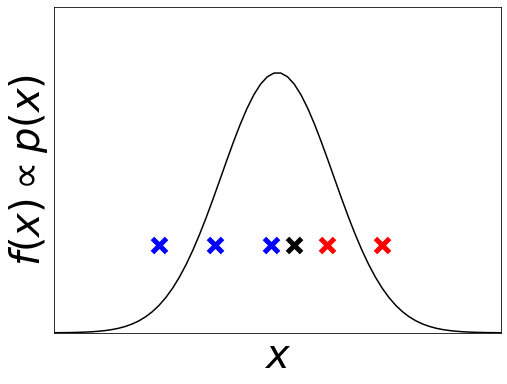

In [6]:
x = np.linspace(-6., 6., 100)
f = list(map(unnorm_log_prob, x))

plt.figure(figsize=(8, 6))
plt.plot(x, np.exp(f), color='black')
plt.scatter(x0, np.exp(y), color='black', marker='x', zorder=3, s=200, linewidth=5)
plt.scatter(Lhist, np.exp(y) * np.ones_like(Lhist), color='blue', marker='x', s=200, linewidth=5)
plt.scatter(Rhist, np.exp(y) * np.ones_like(Rhist), color='red', marker='x', s=200, linewidth=5)

plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.ylim([0, 0.5])
plt.savefig('images/stepout2.pdf')
plt.show()

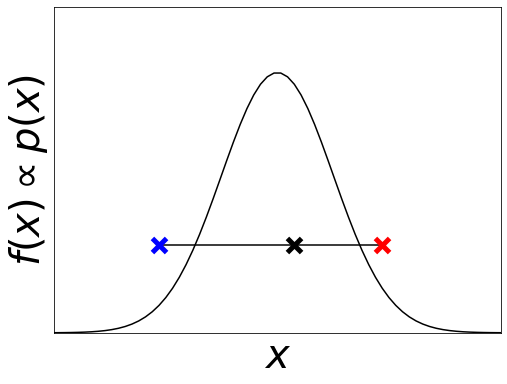

In [7]:
x = np.linspace(-6., 6., 100)
f = list(map(unnorm_log_prob, x))

plt.figure(figsize=(8, 6))
plt.plot(x, np.exp(f), color='black')
plt.scatter(x0, np.exp(y), color='black', marker='x', s=200, linewidth=5, zorder=3)
plt.scatter(Lhist[-1], np.exp(y), color='blue', marker='x', s=200, linewidth=5, zorder=3)
plt.scatter(Rhist[-1], np.exp(y), color='red', marker='x', s=200, linewidth=5, zorder=3)
plt.plot([Lhist[-1], Rhist[-1]], [np.exp(y), np.exp(y)], color='black', zorder=1)

plt.xlabel(r'$x$', fontsize=40)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.xlim([-4, 4])
plt.ylim([0, 0.5])
plt.savefig('images/stepout3.pdf')
plt.show()

In [8]:
mu = 0.
var = 1.

x0 = 1.
y = - 2.

w = 1.
m = 10

unnorm_log_prob = lambda x : quad(x, mu, var)
L, R, (Lhist, Rhist) = step_out_expansion(x0=x0, y=y, unnorm_log_prob=unnorm_log_prob, w=w, m=m)


In [9]:
expand_method = 'step_out'
expand_params = (w, m)
with_shrinkage = True

x1 = sample_acceptable_set(x0=x0,
                           y=y,
                           L=L,
                           R=R,
                           unnorm_log_prob=unnorm_log_prob,
                           expand_method=expand_method,
                           expand_params=expand_params,
                           with_shrinkage=with_shrinkage)

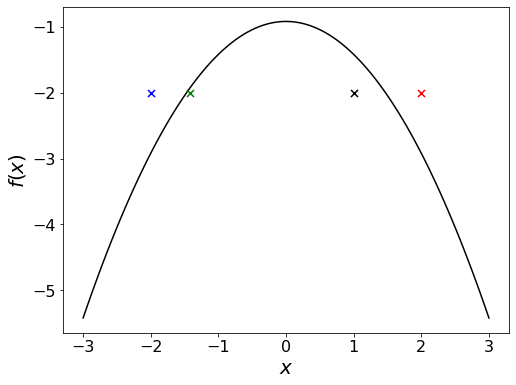

In [10]:
x = np.linspace(-3., 3., 100)
f = list(map(unnorm_log_prob, x))

plt.figure(figsize=(8, 6))
plt.plot(x, f, color='black')
plt.scatter(x1, y, color='green', marker='x', zorder=4, s=50)
plt.scatter(x0, y, color='black', marker='x', zorder=3, s=50)
plt.scatter(Lhist[-1], y, color='blue', marker='x', s=50)
plt.scatter(Rhist[-1], y, color='red', marker='x', s=50)

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x)$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [11]:
expand_method = 'step_out'
expand_params = (w, m)
with_shrinkage = True
num_samples = 100

x1 = [sample_acceptable_set(x0=x0,
                            y=y,
                            L=L,
                            R=R,
                            unnorm_log_prob=unnorm_log_prob,
                            expand_method=expand_method,
                            expand_params=expand_params,
                            with_shrinkage=with_shrinkage) for i in range(num_samples)]

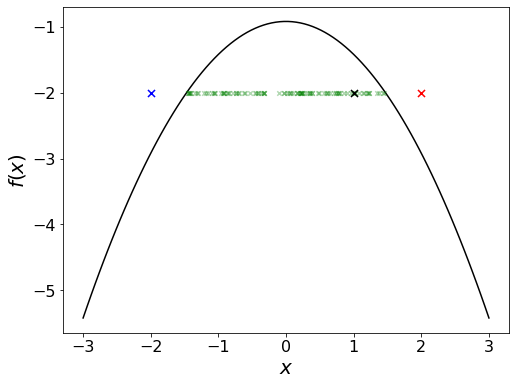

In [12]:
x = np.linspace(-3., 3., 100)
f = list(map(unnorm_log_prob, x))

plt.figure(figsize=(8, 6))
plt.plot(x, f, color='black')
plt.scatter(x1, y * np.ones_like(x1), color='green', marker='x', zorder=4, s=20, alpha=0.3)
plt.scatter(x0, y, color='black', marker='x', zorder=5, s=50)
plt.scatter(Lhist[-1], y, color='blue', marker='x', s=50)
plt.scatter(Rhist[-1], y, color='red', marker='x', s=50)

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x)$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [13]:
x0 = 1.

mu = 0.
var = 1.
unnorm_log_prob = lambda x : quad(x, mu, var)

expand_method = 'step_out'

w = 1.
m = 10
expand_params = (w, m)
with_shrinkage = True
num_samples = 1000

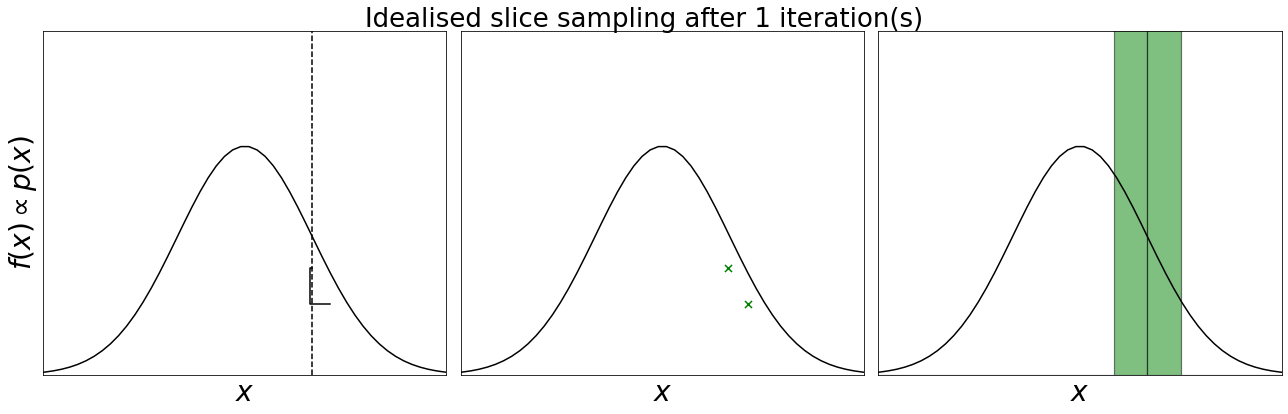

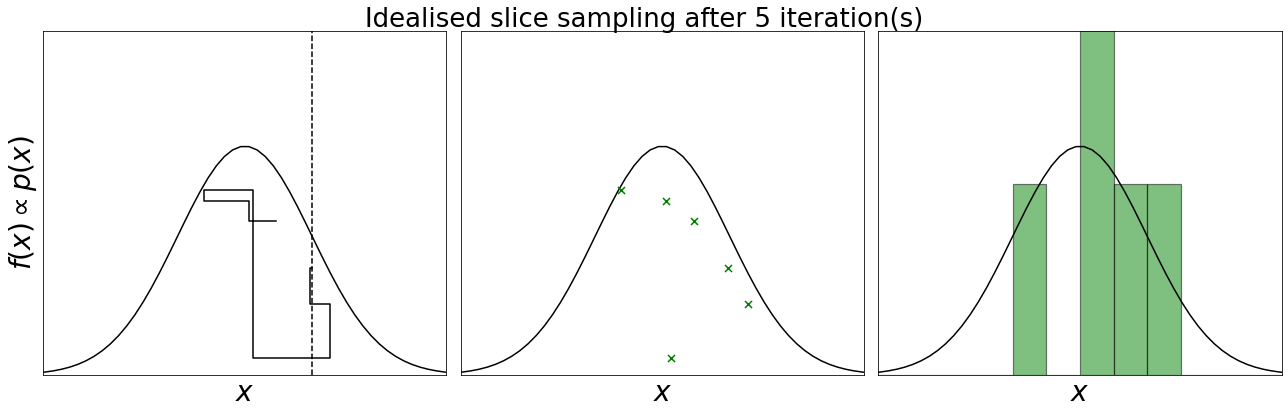

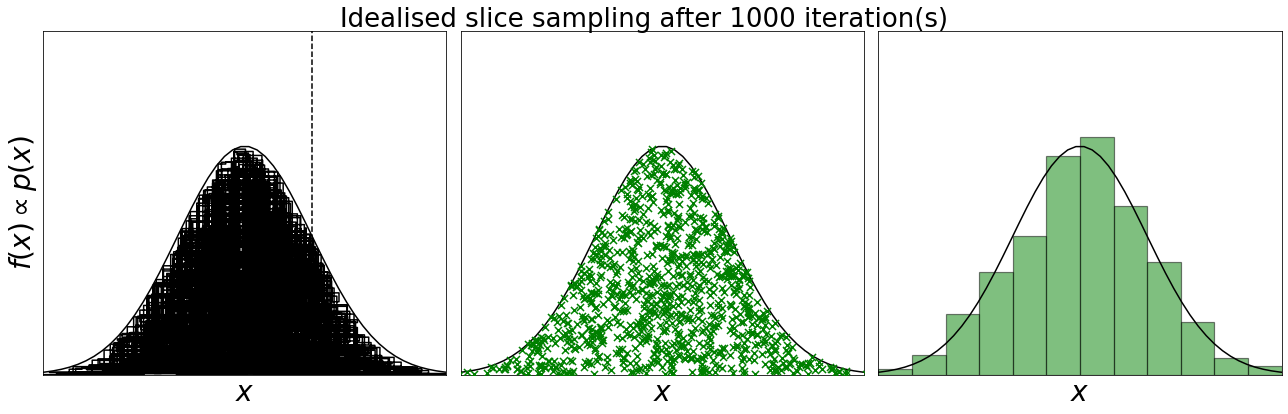

In [91]:
x_samples = []
y_samples = []

x = x0

plot_times = [1, 5, 1000] # [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000]

np.random.seed(10)

for i in range(1, num_samples + 2):
    
    x, y = slice_sample(x0=x,
                        unnorm_log_prob=unnorm_log_prob,
                        expand_method=expand_method,
                        expand_params=expand_params,
                        with_shrinkage=with_shrinkage)
    
    x_samples.append(x)
    y_samples.append(y)
    
    x_rep = np.array(x_samples).repeat(2, axis=0)
    x_rep = np.append(x0, x_rep)[:-1]
    y_rep = np.array(y_samples).repeat(2, axis=0)

    x_ = np.linspace(-6., 6., 100)
    f_ = list(map(unnorm_log_prob, x_))
    
    if i-1 in plot_times:

        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        plt.plot(x_, np.exp(f_), color='black')
        plt.plot(x_rep, np.exp(y_rep), color='black')
        plt.plot([x0, x0], [0, 2], '--', color='black', zorder=5)

        plt.xlabel(r'$x$', fontsize=28)
        plt.ylabel(r'$f(x) \propto p(x)$', fontsize=28)
        plt.ylim([0, 0.6])
        plt.xlim([-3, 3])
        plt.xticks([])
        plt.yticks([])

        plt.subplot(1, 3, 2)
        plt.plot(x_, np.exp(f_), color='black')
        plt.scatter(x_samples, np.exp(y_samples), color='green', marker='x', zorder=3, s=50)

        plt.xlabel(r'$x$', fontsize=28)
        plt.ylabel(r'', fontsize=20)
        plt.ylim([0, 0.6])
        plt.xlim([-3, 3])
        plt.xticks([])
        plt.yticks([])

        plt.subplot(1, 3, 3)
        plt.plot(x_, np.exp(f_), color='black')
        plt.hist(x_samples, bins=12, align='mid', range=[-3, 3], density=True, color='green', alpha=0.5, edgecolor='black', linewidth=1.2)

        plt.xlabel(r'$x$', fontsize=28)
        plt.ylabel(r'', fontsize=20)
        plt.ylim([0, 0.6])
        plt.xlim([-3, 3])
        plt.xticks([])
        plt.yticks([])

        plt.suptitle(f'Idealised slice sampling after {i-1} iteration(s)', fontsize=26)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.savefig(f'img/{i-1}.png')
        plt.show()

# Presentation figures

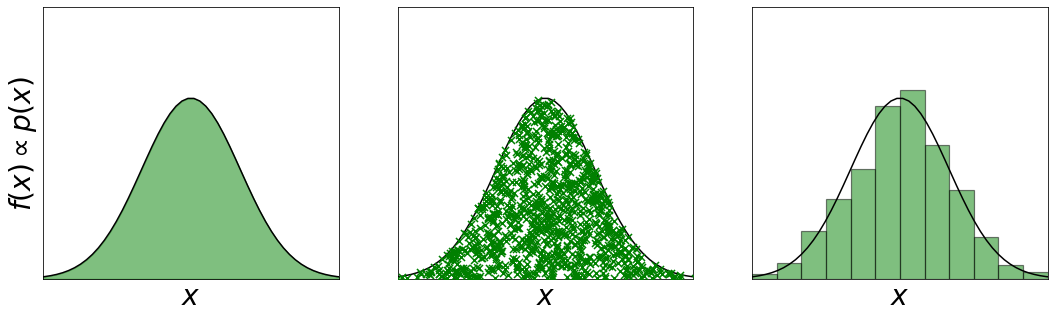

In [77]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(x_, np.exp(f_), color='black')
plt.fill_between(x_, np.zeros_like(f_), np.exp(f_), color='green', alpha=0.5)

plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.plot(x_, np.exp(f_), color='black')
plt.scatter(x_samples, np.exp(y_samples), color='green', marker='x', zorder=3, s=50)

plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'', fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.plot(x_, np.exp(f_), color='black')
plt.hist(x_samples, bins=12, align='mid', range=[-3, 3], density=True, color='green', alpha=0.5, edgecolor='black', linewidth=1.2)

plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'', fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.xticks([])
plt.yticks([])
plt.savefig('img/motivating.png')
plt.show()

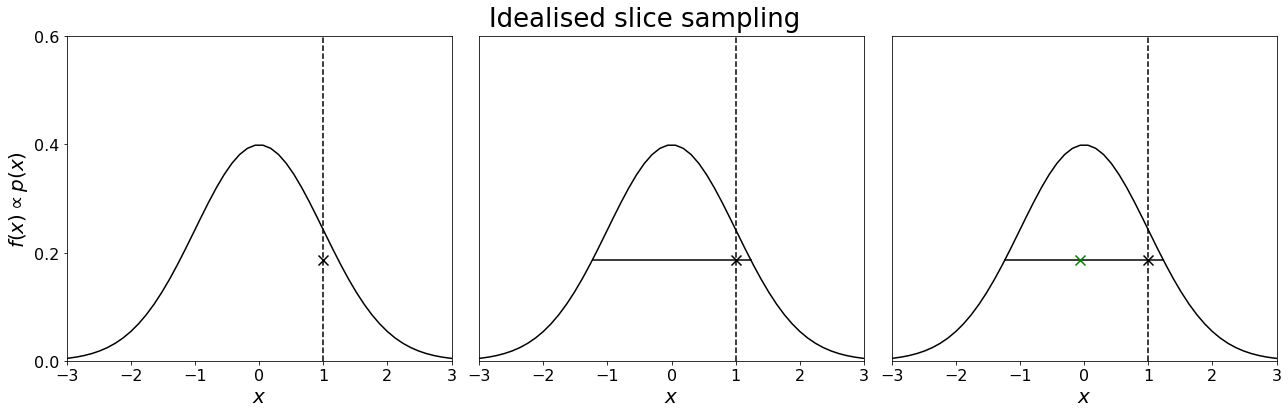

In [30]:
y = np.exp(unnorm_log_prob(x0)) * np.random.rand()
root = (- 2 * var * (np.log(y) + 0.5 * np.log(2 * np.pi * var))) ** 0.5
xnew = - root + 2 * root * np.random.rand()

f_ = list(map(unnorm_log_prob, x_))

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(x_, np.exp(f_), color='black')
plt.scatter(x0, y, marker='x', s=100, color='black', zorder=5)
plt.plot([x0, x0], [0, 2], '--', color='black', zorder=5)

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.yticks(np.linspace(0.0, 0.6, 4))

plt.subplot(1, 3, 2)
plt.plot(x_, np.exp(f_), color='black')
plt.scatter(x0, y, marker='x', s=100, color='black', zorder=5)
plt.plot([x0, x0], [0, 2], '--', color='black', zorder=5)
plt.plot([-root, root], [y, y], color='black', zorder=4)

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.plot(x_, np.exp(f_), color='black')
plt.scatter(x0, y, marker='x', s=100, color='black', zorder=5)
plt.plot([x0, x0], [0, 2], '--', color='black', zorder=5)
plt.plot([-root, root], [y, y], color='black', zorder=4)
plt.scatter(xnew, y, marker='x', s=100, color='green', zorder=6)

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.yticks([])

plt.suptitle(f'Idealised slice sampling', fontsize=26)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/idealised.pdf')
plt.show()

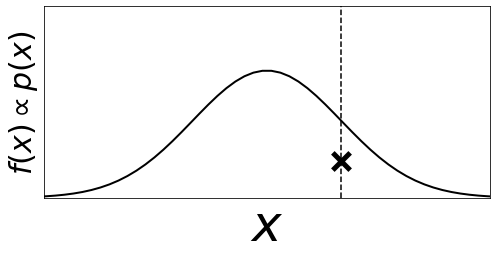

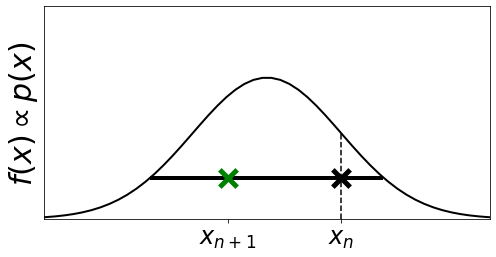

In [93]:
np.random.seed(6)

y = np.exp(unnorm_log_prob(x0)) * np.random.rand() - 0.1
root = (- 2 * var * (np.log(y) + 0.5 * np.log(2 * np.pi * var))) ** 0.5
xnew = - root + 2 * root * np.random.rand()

f_ = list(map(unnorm_log_prob, x_))

plt.figure(figsize=(7, 4))
plt.plot(x_, np.exp(f_), color='black', linewidth=2)
plt.scatter(x0, y, marker='x', s=300, color='black', zorder=5, linewidth=5)
plt.plot([x0, x0], [0, 2], '--', color='black', zorder=5)

plt.xlabel(r'$x$', fontsize=50)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.xticks([])
plt.yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('img/idealised1.png')
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(x_, np.exp(f_), color='black', linewidth=2)
plt.scatter(x0, y, marker='x', s=300, color='black', zorder=5, linewidth=5)
plt.plot([x0, x0], [0, np.exp(unnorm_log_prob(x0))], '--', color='black', zorder=5)
plt.plot([-root+3e-2, root-3e-2], [y, y], color='black', linewidth=4, zorder=0)
plt.scatter(xnew, y, marker='x', s=300, color='green', zorder=6, linewidth=5)

# plt.xlabel(r'$x$', fontsize=50)
plt.ylabel(r'$f(x) \propto p(x)$', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 0.6])
plt.xlim([-3, 3])
plt.xticks([x0, xnew], ['$x_{n}$', '$x_{n+1}$'], fontsize=24)
plt.yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('img/idealised.png')
plt.show()